# Regresión Lineal

Lizbeth Peralta Malváez, Omar López Rincón.

Universidad de las Américas Puebla

La regresión lineal permite hallar un valor esperado de una variable aleatoria a cuando b toma un valor específico. 

Un método utilizado para la regresión lineal es el de mínimos cuadrados, el cual consiste en minimizar la suma de las distancias verticales entre los puntos de la muestra y los puntos del modelo

In [1]:
#Importar pandas para leer el documento csv
#Importar matplotlib.pyplot para graficar
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Permite graficar en notebook
%matplotlib inline

In [7]:
# Se lee el documento csv con la información, en este caso se utiliza una base de datos del Machine Learning Repository
#que consta de telemonitoreo de personas que padecen parkinson
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data')#,index_col=0)
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [3]:
#tamaño del set
data.shape

(5875, 21)

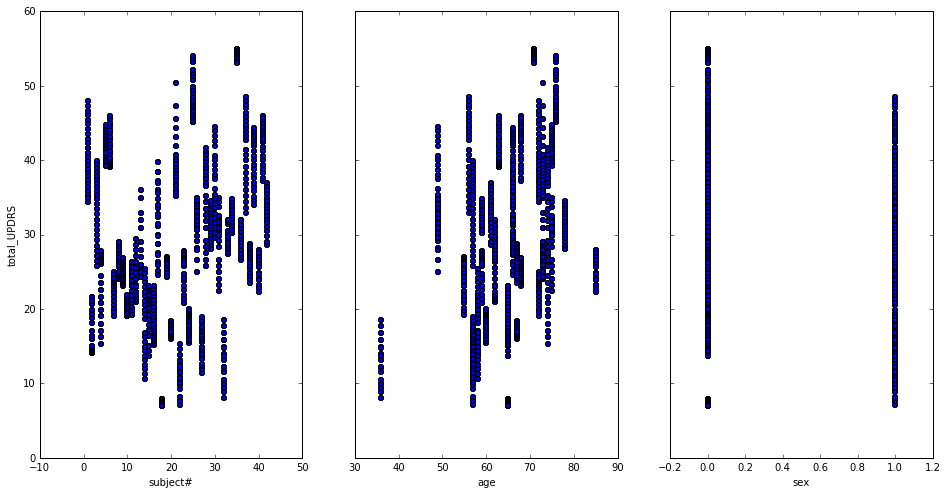

In [8]:
#graficas con las relaciones seleccionadas. Se seleccionó la edad y el sexo relacionado con UPDRS (estudio para saber
#el nivel de parkinson de la persona)
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='subject#', y='total_UPDRS', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='age', y='total_UPDRS', ax=axs[1])
data.plot(kind='scatter', x='sex', y='total_UPDRS', ax=axs[2])

In [10]:


# create a fitted model in one line
#ols = ordinary least squares
lm = smf.ols(formula='total_UPDRS ~ age', data=data).fit()

# print the coefficients
#La relación entre UPDRS y la edad de la persona es de 37%(checar dato)
#A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
#Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

lm.params

Intercept    4.628064
age          0.376374
dtype: float64

In [11]:
#Prediction
#predicción para una persona de 95 años
#Let's say that there was a new market where the TV advertising spend was $50,000. 
#What would we predict for the Sales in that market?
#USING STATSMODELS
#You have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'age': [95]})
X_new.head()

,age
0,95


In [12]:
# use the model to make predictions on a new value
lm.predict(X_new)
#Thus, we would predict Sales of 9,409 widgets in that market.
#40%? checar dato

array([ 40.38357222])

In [13]:
#LEAST SQUARE 
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'age': [data.age.min(), data.age.max()]})
X_new.head()

,age
0,36
1,85


In [14]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 18.17751992,  36.61983455])

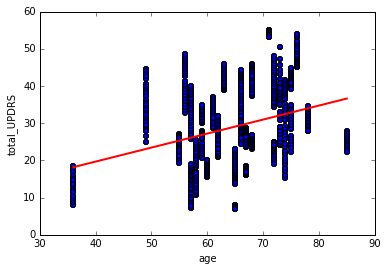

In [15]:
# first, plot the observed data
data.plot(kind='scatter', x='age', y='total_UPDRS')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)